In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')


df = pd.read_csv(r"C:\Users\anupa\Downloads\youtube_all_online_courses_metadata.csv")
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,course_title,platform,instructor,category,duration_minutes,views,likes,comments,views_per_day,engagement_rate
0,Python Full Course for Beginners,YouTube,Programming with Mosh,python,122.350000,5142164,123882,3300,14088.120548,0.024733
1,Python Full Course for Beginners,YouTube,Programming with Mosh,python,374.116667,46807039,1232358,61606,128238.463014,0.027645
2,Python Full Course for free 🐍,YouTube,Bro Code,python,720.000000,8241062,261982,15728,22578.252055,0.033698
3,Python Full Course for Beginners | Complete Al...,YouTube,Dave Gray,python,518.933333,1018947,21596,647,2791.635616,0.021829
4,Learn Python - Full Course for Beginners [Tuto...,YouTube,freeCodeCamp.org,python,266.866667,48296733,1111600,46042,132319.816438,0.023969


In [7]:
df.isnull().sum()

course_title        0
platform            0
instructor          0
category            0
duration_minutes    0
views               0
likes               0
comments            0
views_per_day       0
engagement_rate     0
dtype: int64

In [8]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_title(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df["clean_title"] = df["course_title"].apply(clean_title)
df["title_length"] = df["clean_title"].apply(lambda x: len(x.split()))

df.to_csv("nlp_preprocessed_courses1.csv", index=False)
print("Saved: nlp_preprocessed_courses1.csv")


Saved: nlp_preprocessed_courses1.csv


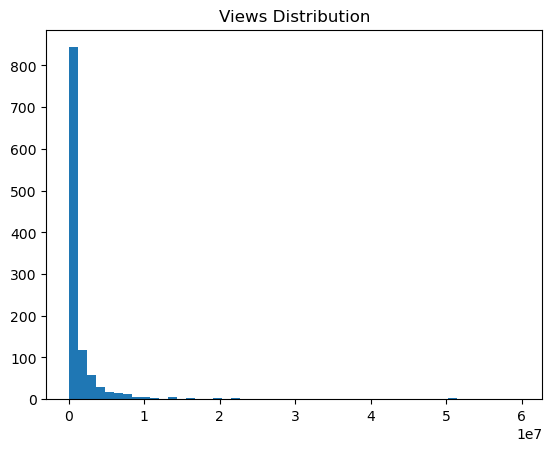

In [9]:


df = pd.read_csv(r"C:\Users\anupa\OneDrive\Desktop\nlp_preprocessed_courses1.csv")

plt.hist(df["views"], bins=50)
plt.title("Views Distribution")
plt.show()



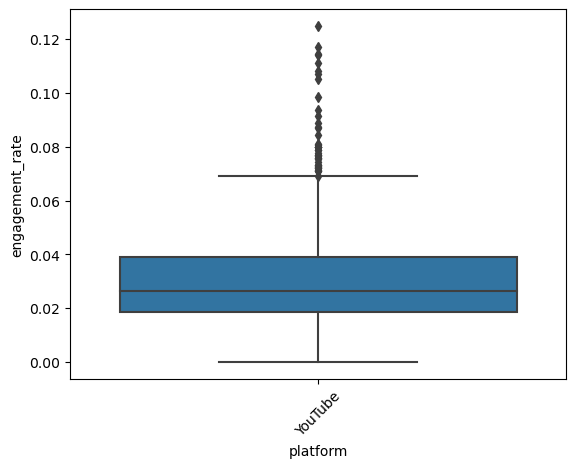

In [10]:
sns.boxplot(x="platform", y="engagement_rate", data=df)
plt.xticks(rotation=45)
plt.show()



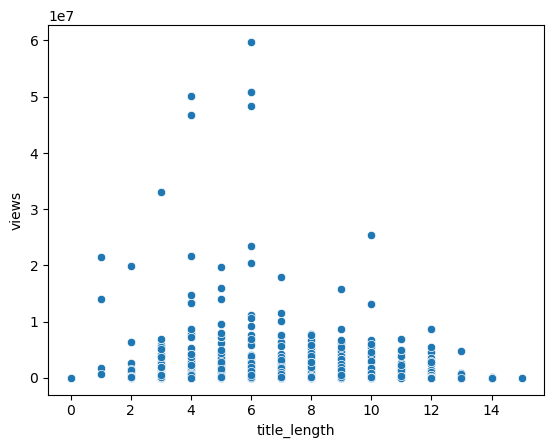

In [11]:
sns.scatterplot(x="title_length", y="views", data=df)
plt.show()




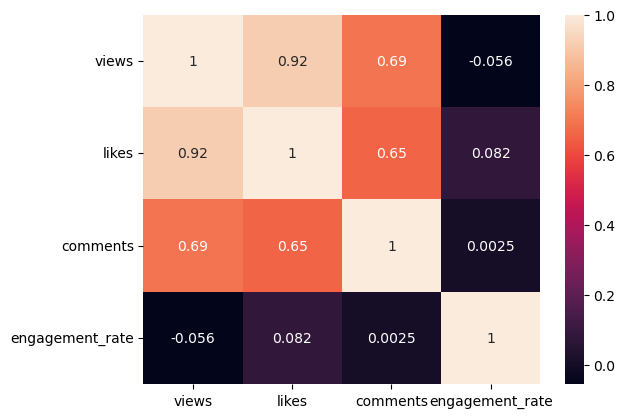

In [12]:
corr = df[['views','likes','comments','engagement_rate']].corr()
sns.heatmap(corr, annot=True)
plt.show()